# DSO 560 Natural Language Processing Final Project

### Team members: Tanner Curley, Shao Xuan Chew, Robert Zhu


### Todo: overall code structure

In [1]:
# !python -m spacy download en_core_web_md

In [15]:
from keras.layers import Input, Dense, LSTM, Flatten, concatenate, Activation, RepeatVector, Permute
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
#from keras_self_attention import SeqSelfAttention
from random import randint
from numpy import array, argmax, asarray, zeros
import numpy as np 
import pandas as pd
import spacy
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from textacy import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
nlp = spacy.load('en_core_web_md')

In [3]:
df = pd.read_csv('complaints_processed.csv')
df.head()


,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [4]:
preproc = preprocessing.make_pipeline(
    preprocessing.normalize.hyphenated_words,
    preprocessing.remove.accents,
)

In [5]:
set(stopwords.words('english'))
# removing some negative words from stopwords list
nltk_stopwords = set(stopwords.words('english'))
nltk_stopwords.remove('below')
nltk_stopwords.remove("aren't")
nltk_stopwords.remove('couldn')
nltk_stopwords.remove("couldn't")
nltk_stopwords.remove("didn't")
nltk_stopwords = list(nltk_stopwords)
# add some abstract terms
nltk_stopwords.append('like')
nltk_stopwords.append('please')

nltk_stopwords = set(nltk_stopwords)

In [6]:
# removing all words with more than 15 digits
df['narrative'] = df['narrative'].str.replace(r'\b([a-z]|[A-Z]){15,}\b', '', case=False)

<ipython-input-6-be1b2f4fd802>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['narrative'] = df['narrative'].str.replace(r'\b([a-z]|[A-Z]){15,}\b', '', case=False)


In [7]:
# removing all characters that appear more than 2 times
df['narrative'] = df['narrative'].str.replace(r'(.)\1{3,}?', '', case=False)


<ipython-input-7-19daef694029>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['narrative'] = df['narrative'].str.replace(r'(.)\1{3,}?', '', case=False)


In [8]:
# %pip install -U textblob
# !python -m textblob.download_corpora

2. Wordcloud

In [9]:
# %pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
from wordcloud import WordCloud

In [33]:
complaint_types = list(df['product'].value_counts().index)

In [25]:
def df_to_wordcloud(srs):
    srs = srs.sample(frac=0.1)
    srs = srs.str.cat(sep=' ')
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(srs)
    return wordcloud

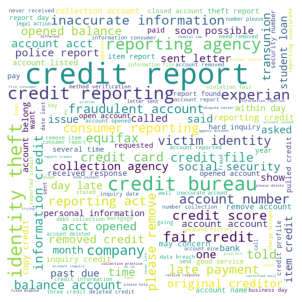

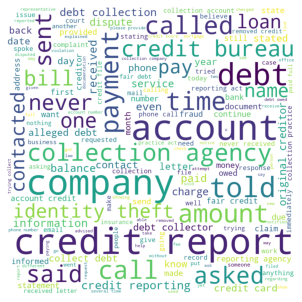

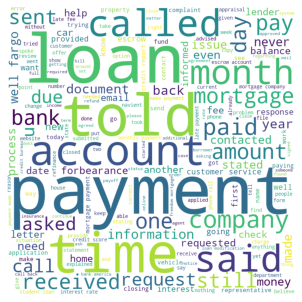

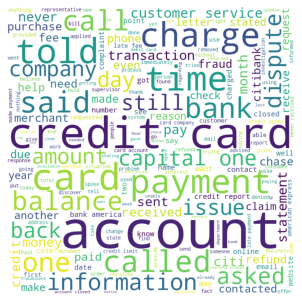

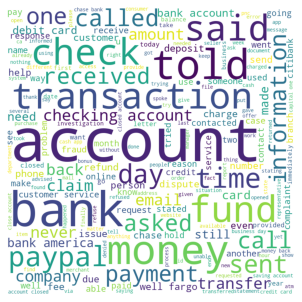

In [36]:
for each in complaint_types:
    wordcloud = df_to_wordcloud(df[df['product'] == each]['narrative'])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig('figs/%s.png'%each)
    plt.show()